In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog
from tqdm import tqdm


## Global Parameters

In [3]:
IMAGE_SIZE = (128, 128)
HOG_PARAMS = {
    "orientations": 9,
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2-Hys"
}


## Dataset Path

In [4]:
yourPath = r"C:\Users\pc\PycharmProjects\Project\augmented_dataset"
DATASET_PATH = yourPath


## Feature Extraction


In [5]:
def extract_hog_features(img):
    """
    Convert an image into a 1D HOG feature vector.
    """
    img = cv2.resize(img, IMAGE_SIZE)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    features = hog(
        gray,
        orientations=HOG_PARAMS["orientations"],
        pixels_per_cell=HOG_PARAMS["pixels_per_cell"],
        cells_per_block=HOG_PARAMS["cells_per_block"],
        block_norm=HOG_PARAMS["block_norm"]
    )

    return features


## Feature Matrix Builder


In [6]:
def build_feature_dataset(dataset_path):
    """
    Convert all images in the dataset into HOG feature vectors.
    """
    X = []
    y = []

    for label in sorted(os.listdir(dataset_path)):
        class_path = os.path.join(dataset_path, label)

        if not os.path.isdir(class_path):
            continue

        print(f"Extracting HOG features from class: {label}")

        for img_name in tqdm(os.listdir(class_path)):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            features = extract_hog_features(img)
            X.append(features)
            y.append(label)

    return np.array(X), np.array(y)


## Run Entry


In [7]:
X, y = build_feature_dataset(DATASET_PATH)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)


Extracting HOG features from class: cardboard


100%|██████████| 1482/1482 [00:13<00:00, 111.85it/s]


Extracting HOG features from class: glass


100%|██████████| 2310/2310 [00:22<00:00, 100.66it/s]


Extracting HOG features from class: metal


100%|██████████| 1890/1890 [00:18<00:00, 101.91it/s]


Extracting HOG features from class: paper


100%|██████████| 2694/2694 [00:24<00:00, 107.83it/s]


Extracting HOG features from class: plastic


100%|██████████| 2178/2178 [00:19<00:00, 110.77it/s]


Extracting HOG features from class: trash


100%|██████████| 636/636 [00:05<00:00, 113.28it/s]


Feature matrix shape: (11190, 8100)
Labels shape: (11190,)


## HOG Visualization


In [8]:
def show_hog_examples(dataset_path):
    """
    Display one original image and its HOG visualization per class.
    """
    labels = sorted(os.listdir(dataset_path))
    num_classes = len(labels)

    plt.figure(figsize=(10, num_classes * 4))
    plot_index = 1

    for label in labels:
        class_path = os.path.join(dataset_path, label)

        if not os.path.isdir(class_path):
            continue

        # first image
        img_name = os.listdir(class_path)[0]
        img_path = os.path.join(class_path, img_name)

        img = cv2.imread(img_path)
        img = cv2.resize(img, IMAGE_SIZE)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        _, hog_image = hog(
            gray,
            orientations=HOG_PARAMS["orientations"],
            pixels_per_cell=HOG_PARAMS["pixels_per_cell"],
            cells_per_block=HOG_PARAMS["cells_per_block"],
            block_norm=HOG_PARAMS["block_norm"],
            visualize=True
        )

        # Original image
        plt.subplot(num_classes, 2, plot_index)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"{label} - Original")
        plt.axis("off")

        # HOG image
        plt.subplot(num_classes, 2, plot_index + 1)
        plt.imshow(hog_image, cmap="gray")
        plt.title(f"{label} - HOG Visualization")
        plt.axis("off")

        plot_index += 2

    plt.tight_layout()
    plt.show()


## Results

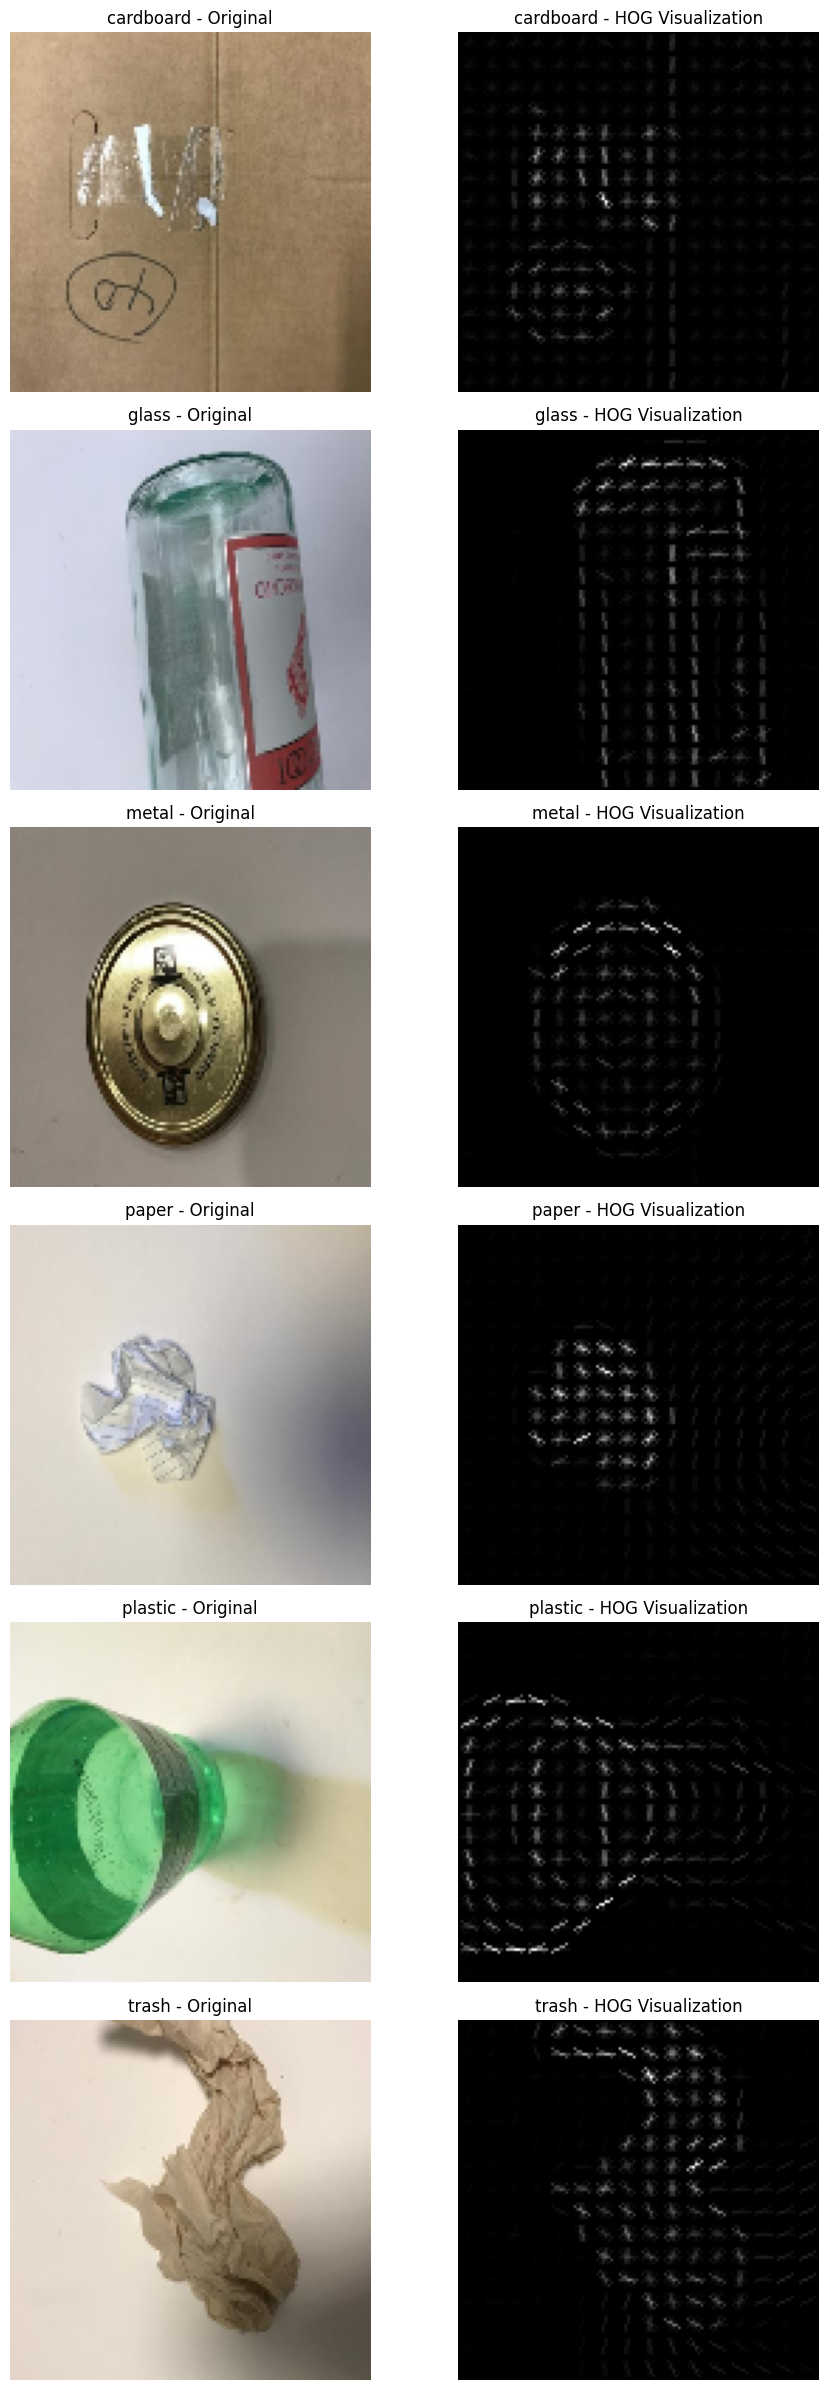

In [9]:
show_hog_examples(DATASET_PATH)

## Why 8100 Features

Image size = 128 × 128

Pixels per cell = 8 × 8

Cells per block = 2 × 2

Orientations = 9




1- Number of cells per dimension:
128 / 8 = 16 cells

2- Blocks per dimension:
16 - 2 + 1 = 15 blocks

️3- Total blocks:
15 × 15 = 225 blocks

4- Features per block:
2 × 2 × 9 = 36 features

5- Total features:
225 × 36 = 8100

## Save Extracted HOG Features

In [10]:

FEATURES_PATH = r"C:\Users\pc\PycharmProjects\Project\features"
os.makedirs(FEATURES_PATH, exist_ok=True)

np.save(os.path.join(FEATURES_PATH, "X_hog.npy"), X)
np.save(os.path.join(FEATURES_PATH, "y.npy"), y)

print("HOG features saved successfully ✔")
print("X_hog shape:", X.shape)
print("y shape:", y.shape)

HOG features saved successfully ✔
X_hog shape: (11190, 8100)
y shape: (11190,)
